## Import Libraries

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Dataset

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head() # Kyphosis absense or present after operation, age in months, number of vertebrae, start vertebrae

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [39]:
dtree2 = DecisionTreeClassifier()

In [40]:
dtree2.fit(X_train2,y_train2)

ValueError: could not convert string to float: 'C'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


## Splitting the dataset into Train and Test sets

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Building the Model - Decision Trees

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier()

## Training the Model

In [11]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Evaluating the Model 

In [12]:
predictions = dtree.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [14]:
print(classification_report(y_test,predictions))
# The support is the number of occurrences of each class in y_test.
# macro average (averaging the unweighted mean per label) 
# weighted average (averaging the support-weighted mean per label)

              precision    recall  f1-score   support

      absent       0.86      0.95      0.90        20
     present       0.67      0.40      0.50         5

    accuracy                           0.84        25
   macro avg       0.77      0.68      0.70        25
weighted avg       0.82      0.84      0.82        25



In [15]:
print(accuracy_score(y_test,predictions))

0.84


In [16]:
print(confusion_matrix(y_test,predictions))

[[19  1]
 [ 3  2]]


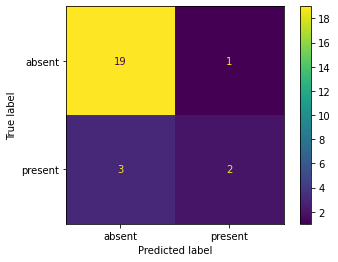

In [17]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtree, X_test, y_test)  
plt.show();

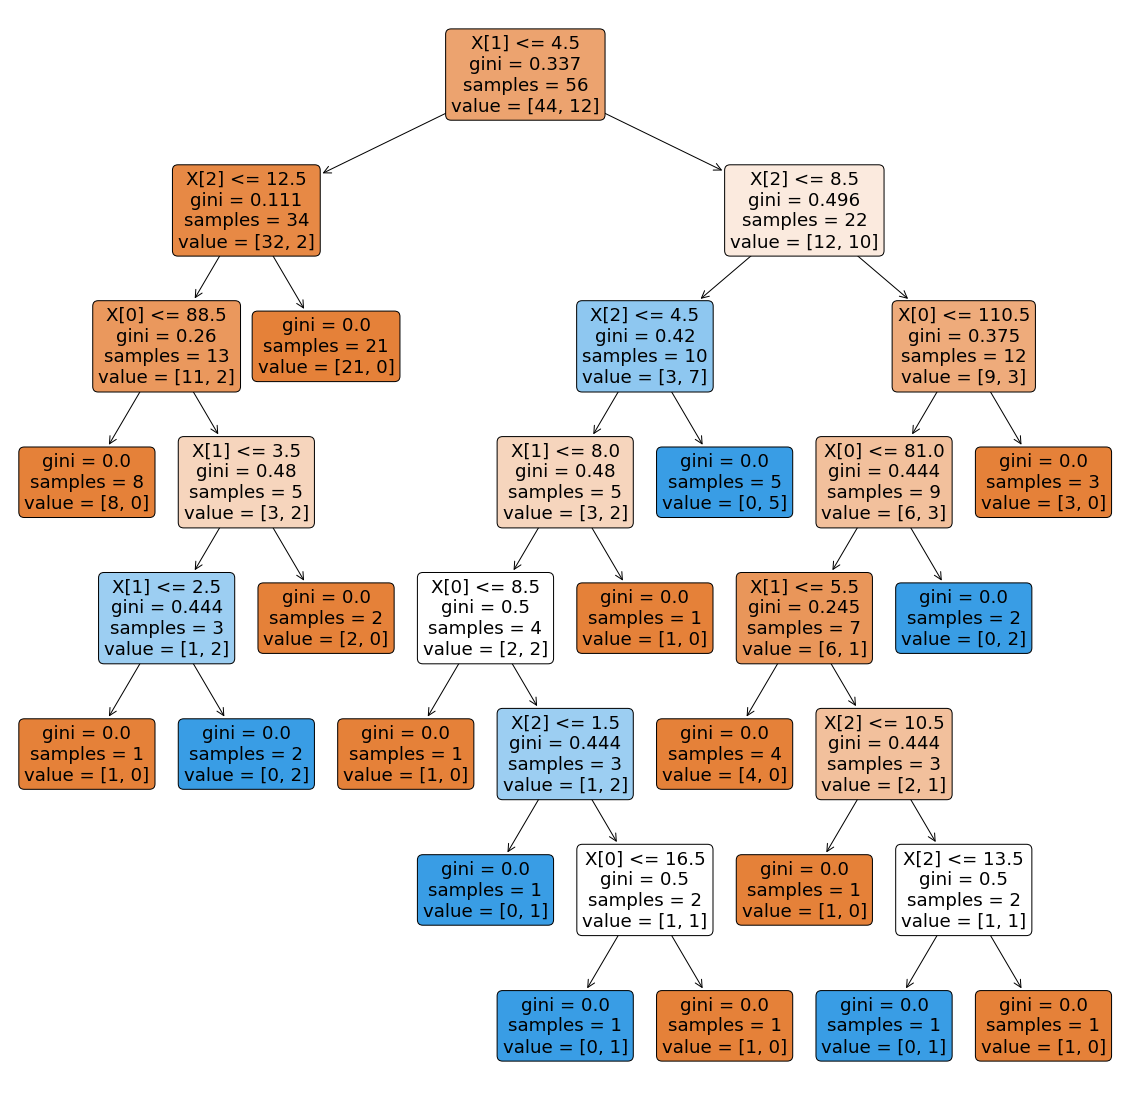

In [18]:
from sklearn import tree

plt.figure(figsize=(20,20))

tree.plot_tree(dtree, filled=True, rounded=True);

## Random Forests

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 20, criterion = 'gini', max_depth = 4) 
# n_estimators: The number of trees in the forest.
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=20)

In [20]:
rfc_pred = rfc.predict(X_test)

In [21]:
print(confusion_matrix(y_test,rfc_pred))

[[19  1]
 [ 4  1]]


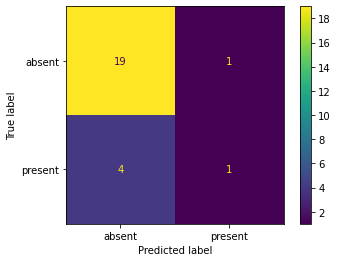

In [22]:
plot_confusion_matrix(rfc, X_test, y_test)  
plt.show()

In [23]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.83      0.95      0.88        20
     present       0.50      0.20      0.29         5

    accuracy                           0.80        25
   macro avg       0.66      0.57      0.58        25
weighted avg       0.76      0.80      0.76        25



In [33]:
print(accuracy_score(y_test,rfc_pred))

0.8


## Grid Search

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [10,20,30], 
    "criterion": ["gini", "entropy"],
    "max_depth": [2,4,6] 
    
}

grid = GridSearchCV(rfc, param_grid, cv = 5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)
# n_jobs >> Number of jobs to run in parallel >> -1 means using all processors.
# verbose >> to show the details or not

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, n_estimators=20),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6], 'n_estimators': [10, 20, 30]},
             verbose=1)

In [28]:
grid_df = pd.DataFrame(grid.cv_results_)
grid_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027615,0.002971,0.005041,0.001053,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.750000,0.818182,0.818182,0.818182,0.636364,0.768182,0.071002,8
1,0.050930,0.002521,0.007136,0.000520,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.750000,0.818182,0.818182,0.818182,0.636364,0.768182,0.071002,8
2,0.074848,0.002670,0.008430,0.000467,gini,2,30,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.750000,0.818182,0.818182,0.727273,0.727273,0.768182,0.041660,8
3,0.028190,0.001811,0.004974,0.000534,gini,4,10,"{'criterion': 'gini', 'max_depth': 4, 'n_estim...",0.666667,0.818182,1.000000,0.909091,0.545455,0.787879,0.163749,3
4,0.049007,0.001966,0.006327,0.000208,gini,4,20,"{'criterion': 'gini', 'max_depth': 4, 'n_estim...",0.750000,0.727273,0.727273,0.818182,0.727273,0.750000,0.035209,16
5,0.070825,0.000930,0.007769,0.000439,gini,4,30,"{'criterion': 'gini', 'max_depth': 4, 'n_estim...",0.750000,0.818182,0.909091,0.727273,0.636364,0.768182,0.091363,8
6,0.025073,0.000336,0.004125,0.000161,gini,6,10,"{'criterion': 'gini', 'max_depth': 6, 'n_estim...",0.750000,0.818182,0.818182,0.909091,0.727273,0.804545,0.063636,2
7,0.044720,0.001224,0.006237,0.001704,gini,6,20,"{'criterion': 'gini', 'max_depth': 6, 'n_estim...",0.750000,0.727273,0.818182,0.818182,0.818182,0.786364,0.039626,4
8,0.063659,0.002528,0.007557,0.000708,gini,6,30,"{'criterion': 'gini', 'max_depth': 6, 'n_estim...",0.750000,0.727273,0.818182,0.909091,0.636364,0.768182,0.091363,14
9,0.022619,0.000791,0.004002,0.000144,entropy,2,10,"{'criterion': 'entropy', 'max_depth': 2, 'n_es...",0.750000,0.818182,0.727273,0.818182,0.727273,0.768182,0.041660,8


In [29]:
parameters = ['param_criterion','param_max_depth','param_n_estimators','mean_test_score','rank_test_score']
grid_df[parameters].sort_values(by = ['rank_test_score'])

,param_criterion,param_max_depth,param_n_estimators,mean_test_score,rank_test_score
17,entropy,6,30,0.822727,1
6,gini,6,10,0.804545,2
3,gini,4,10,0.787879,3
15,entropy,6,10,0.786364,4
14,entropy,4,30,0.786364,4
7,gini,6,20,0.786364,4
16,entropy,6,20,0.786364,4
11,entropy,2,30,0.768182,8
9,entropy,2,10,0.768182,8
0,gini,2,10,0.768182,8


In [30]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 30}

In [31]:
grid.best_score_

0.8227272727272726

In [34]:
rfc2 = RandomForestClassifier(criterion = 'entropy', max_depth = 6, n_estimators = 30) 
rfc2.fit(X_train, y_train)
rfc2_pred = rfc2.predict(X_test)
print(accuracy_score(y_test,rfc2_pred))

0.8


# Resources
- https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp